DBSCAN is a powerful clustering technique when your data hs noise and you dont know shape/distribution of your cluster.
it has two key parameters epsilon/radious, and minPoints.
The optimal value of radious can be found using domain knowledge, elbow method or Silhouette Score

The options to choose minPoints are:
-The larger the data set, the larger the value of MinPts should be
-If the data set is noisier, choose a larger value of MinPts
-Generally, MinPts should be greater than or equal to the dimensionality of the data set


In [25]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

data=pd.read_csv("dataset/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
data.isnull().sum()
data.drop_duplicates(inplace=True)

In [54]:
X=data[["Annual_Income_(k$)","Spending_Score"]]
X.head()
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

#print(X[0:2,:])

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow method
======
-find Average distance between each point and its k nearest neighbors, where k = the MinPts value you selected.

-The average k-distances are then plotted in ascending order on a k-distance graph.

-find the optimal value for ε at the point of maximum curvature 

200 200


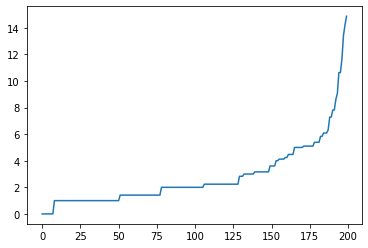

In [65]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
minPoints=2
neighbors = NearestNeighbors(n_neighbors=minPoints)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

print(len(distances),len(X))

distances = np.sort(distances, axis=0) #sort column wise 
distances = distances[:,1]
#print(distances)

plt.plot(distances)

In [66]:
wsse=[]
k=[]
sil_score=[]
for i in range(6,20):
    dbscan=DBSCAN(eps=i, min_samples=15)
    k.append(i)
    dbscan.fit(X)
    #wsse.append(dbscan.inertia_)
    score = silhouette_score(X, dbscan.labels_, metric='euclidean')
    sil_score.append(score)

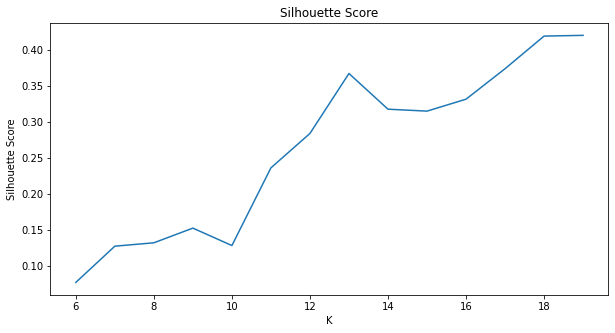

In [67]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.plot(k,sil_score)
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

In [51]:
model=DBSCAN(eps=12,min_samples=15)
model.fit(X)
print(model.labels_)
p_cluster=model.labels_

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  1  2  1  2  0  2  1  2  1  2  1  2  1  2  0  2
  1  2  0  2  1  2  1  2  1  2  1  2  1  2  1  2 -1  2  1  2  1  2  1  2
 -1 -1  1  2  1  2  1  2  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


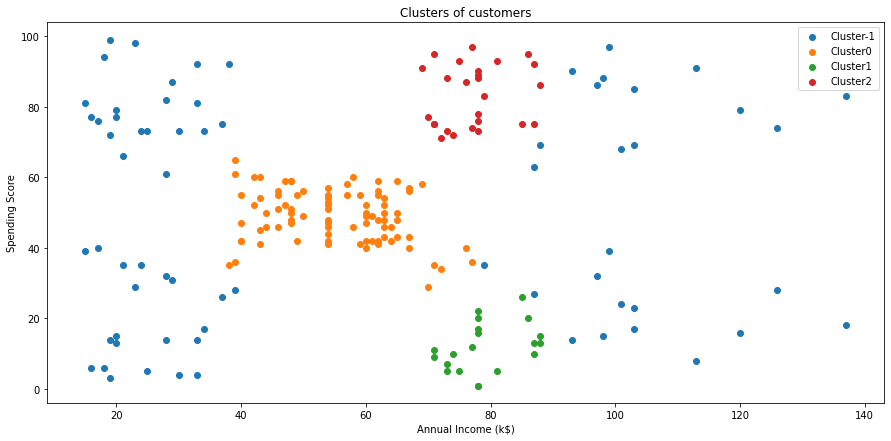

In [52]:
import numpy as np
plt.figure(figsize=(15,7))

for i in np.unique(p_cluster):
    plt.scatter(X[p_cluster==i]["Annual_Income_(k$)"],X[p_cluster==i]["Spending_Score"], label='Cluster'+str(i))

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)